# Example of MCMC run

In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using HDF5
using BenchmarkTools

In [2]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BenchmarkTools
using DSP

In [3]:
# using Revise
using BAT 

# Load Data

## 1.1 Low `p` Population: 

In [ ]:
# conv_mat = load("../data/experiment/dataset_2/m1/conv-matrix-upd-1.jld2")

# conv_matrices = (
#     cam_1 = conv_mat["cam_1"],
#     cam_2 = conv_mat["cam_2"],
#     cam_3 = conv_mat["cam_3"],
#     cam_4 = conv_mat["cam_4"], 
# )

# images = load("../data/experiment/dataset_2/m1/images-satur.jld2");
# event_number = 343

# # Small Charge: Ev_1_3 = 343, Ev_1_1 = 137, Ev_1_2 = 9

# event = (
#     cam_1 = images["cam_1"][event_number,:,:],
#     cam_2 = images["cam_2"][event_number,:,:],
#     cam_3 = images["cam_3"][event_number,:,:],
#     cam_4 = images["cam_4"][event_number,:,:],
#     population = images["charge"][event_number,:][1],
# );

## 1.2 High `p` Population: 

In [4]:
conv_mat = load("../data/experiment/dataset_2/m2/conv-matrix-upd-2.jld2") 

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_4"], 
) 

images = load("../data/experiment/dataset_2/m2/images-satur.jld2"); # removed saturated pixels
# images = load("../data/experiment/dataset_2/m2/images.jld2"); # included saturated pixels
event_number = 2

# Large Charge: Ev_2_2 = 2, Ev_2_1 = 311, Ev_2_3 = 440

event = (
    cam_1 = images["cam_1"][event_number,:,:],
    cam_2 = images["cam_2"][event_number,:,:],
    cam_3 = images["cam_3"][event_number,:,:],
    cam_4 = images["cam_4"][event_number,:,:],
    population = images["charge"][event_number,:][1],
);


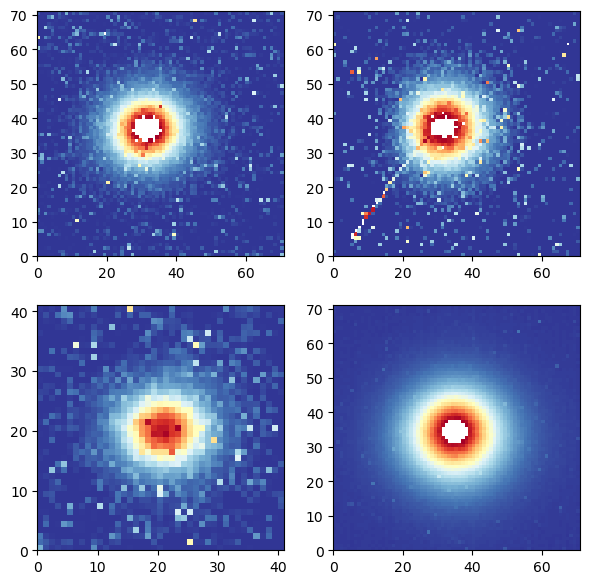

PyObject <matplotlib.collections.QuadMesh object at 0x7f8c3dbd5f70>

In [5]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event.cam_4, cmap="RdYlBu_r")

# Load Model

## Model 35: 

In [ ]:
# include("../src/model-35/likelihood.jl")
# include("../src/model-35/utill_model.jl")
# include("../src/utill.jl")

In [ ]:
# # β = 0.015

# β1 = 0.015
# β2 = 0.008
# β3 = 0.006

# # flat prior for the pixel size
# prior = NamedTupleDist(
#         tr_size = [truncated(Normal(0.2, 0.04), 0.08, 0.25), truncated(Normal(0.2, 0.04), 0.08, 0.25)],
#         ang_spr = [truncated(Normal(4.0, 2.0), 2.0, 6.0), truncated(Normal(4.0, 2.0), 2.0, 6.0)],
#         waist = [Normal(2.9, 0.03)],
#         algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
#         algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
#         cam4_ped = 4.0 .. 40.0,
#         cam4_light_fluct = 1.0 .. 3.0,
#         cam4_light_amp = 1.6 .. 9.9, 
#         resx = [truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(2, 1), 0, Inf), truncated(Normal(1, 0.5), 0, Inf)], 
#         resy = [truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(2, 1), 0, Inf), truncated(Normal(1, 0.5), 0, Inf)], 
#         cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
#         cam4_resy = truncated(Normal(3, 1.5), 0, Inf),
#         psx = [truncated(Normal(27.1, 27.1*β1), 0., Inf), truncated(Normal(21.6, 21.6*β1), 0., Inf), truncated(Normal(114.0, 114.0*β2), 0., Inf)], # pixels are in microns
#         psy = [truncated(Normal(30.5, 30.5*β1), 0., Inf), truncated(Normal(23.4, 23.4*β1), 0., Inf), truncated(Normal(125.0, 125.0*β2), 0., Inf)],
#         cam4_psx = truncated(Normal(121.8, 3*121.8*β3), 0., Inf), # original Pixel size (smaller) 91.0; Updated Pixel size (larger) 121.2
#         cam4_psy = truncated(Normal(120.0, 3*120.0*β3), 0., Inf), # original Pixel size (smaller) 89.4; Updated Pixel size (larger) 120.6
#         light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
#         s_cam = [0.0, 1.478, 15.026, 23.1150],
#     ); 

## Model 38: 

In [7]:
include("../src/model-38/likelihood.jl")
include("../src/model-38/utill_model.jl")
include("../src/utill.jl")

plot_projections (generic function with 1 method)

In [6]:
β1 = 0.015
β2 = 0.008
β3 = 0.006

# flat prior for the pixel size
prior = NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.07, 0.25), truncated(Normal(0.2, 0.04), 0.07, 0.25)],
        ang_spr = [truncated(Normal(4.0, 2.0), 3.0, 7.0), truncated(Normal(4.0, 2.0), 3.0, 7.0)],
        ang_spr_2 = [truncated(Normal(4.0, 2.0), 1.0, 3.5), truncated(Normal(4.0, 2.0), 1.0, 3.5)],
        mixt_pow =  0.5 .. 1.0 ,
        waist = [Normal(2.9, 0.03)],
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9, 
        resx = [truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(2, 1), 0, Inf), truncated(Normal(1, 0.5), 0, Inf)], 
        resy = [truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(2, 1), 0, Inf), truncated(Normal(1, 0.5), 0, Inf)], 
        cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
        cam4_resy = truncated(Normal(3, 1.5), 0, Inf),
        psx = [truncated(Normal(27.1, 27.1*β1), 0., Inf), truncated(Normal(21.6, 21.6*β1), 0., Inf), truncated(Normal(114.0, 114.0*β2), 0., Inf)], # pixels are in microns
        psy = [truncated(Normal(30.5, 30.5*β1), 0., Inf), truncated(Normal(23.4, 23.4*β1), 0., Inf), truncated(Normal(125.0, 125.0*β2), 0., Inf)],
        cam4_psx = truncated(Normal(121.8, 3*121.8*β3), 0., Inf), # original Pixel size (smaller) 91.0; Updated Pixel size (larger) 121.2
        cam4_psy = truncated(Normal(120.0, 3*120.0*β3), 0., Inf), # original Pixel size (smaller) 89.4; Updated Pixel size (larger) 120.6
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.1150],
    ); 

# MCMC settings: 

In [8]:
"""
    Log-Likelihood of the beamline (4 cameras included)
"""
function log_lik_ndiff(;  
    e = event,
    cv_mat = conv_matrices,
    func = conv_tabl_discrete,
    cv_1 = cv_mat.cam_1,
    cv_2 = cv_mat.cam_2,
    cv_3 = cv_mat.cam_3,
    n_threads = Threads.nthreads(),
    )
    
    return params -> begin 
        ll = 0.0
        ll += likelihood_cam13(params, e.cam_1, e.population, cv_1, func, 1, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_2, e.population, cv_2, func, 2, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_3, e.population, cv_3, func, 3, n_threads=n_threads)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4, n_threads=n_threads)
        return LogDVal(ll)
    end
        
end

function log_lik_diff(;  
    e = event,
    cv_mat = conv_matrices,
    func = conv_tabl_cont,
    cv_1 = exp.(cv_mat.cam_1),
    cv_2 = exp.(cv_mat.cam_2),
    cv_3 = exp.(cv_mat.cam_3),
    n_threads = Threads.nthreads(),
    )
    
    return params -> begin 
        ll = 0.0
        ll += likelihood_cam13(params, e.cam_1, e.population, cv_1, func, 1, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_2, e.population, cv_2, func, 2, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_3, e.population, cv_3, func, 3, n_threads=n_threads)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4, n_threads=n_threads)
        
        return LogDVal(ll)
    end
    
end

# log_likelihood = log_lik_diff()

log_likelihood = log_lik_ndiff()

#51 (generic function with 1 method)

In [ ]:
# param_truth = (
#         tr_size = [0.2, 0.2],
#         ang_spr = [4.0, 4.0],
#         waist = [2.9,],
#         algmx = [35,35,20,35], 
#         algmy = [35,35,20,35], 
#         cam4_ped = 34.3,
#         cam4_light_fluct = 2.15,
#         cam4_light_amp = event.population*32.16870*10^-2,
#         resx = [0, 0, 0], 
#         resy = [0, 0, 0], 
#         cam4_resx = 0,
#         cam4_resy = 0,
#         psx = [27.1,21.6,114.], 
#         psy = [30.5,23.4,125.],
#         cam4_psx = 90.9, #3*0.0303*10^3,
#         cam4_psy = 89.4, #3*0.0298*10^3,
#         light_amp  = [event.population*35.14744*10^-2, event.population*50.23506*10^-2, event.population*10.09664*10^-2],
#         s_cam = [0.0, 1.478, 15.026, 23.1150], 
#     );

In [9]:
posterior = PosteriorDensity(log_likelihood, prior)

tuning = AdaptiveMHTuning(
    λ = 0.5,
    α = ClosedInterval(0.15,0.25),
    β = 1.5,
    c = ClosedInterval(1e-4,1e2),
    r = 0.5,
)

convergence = BrooksGelmanConvergence(
    threshold = 1.1,
    corrected = false
)

init = MCMCChainPoolInit(
    init_tries_per_chain = ClosedInterval(50,150),
    max_nsamples_init = 500,
    max_nsteps_init = 500,
    max_time_init = Inf
)

burnin = MCMCMultiCycleBurnin(
    max_nsamples_per_cycle = 5000,
    max_nsteps_per_cycle = 5000,
    max_time_per_cycle = Inf,
    max_ncycles = 20
)

nsamples = 1*10^4
nchains = 4

sampler = MetropolisHastings(tuning=tuning,)

algorithm = MCMCSampling(sampler=sampler, 
    nchains=nchains, 
    init=init, 
    burnin=burnin, 
    convergence=convergence
);

In [10]:
# log_likelihood(param_truth)
# @benchmark log_likelihood(param_truth)

In [11]:
@time samples_tot = bat_sample(
    posterior, nchains*nsamples, algorithm,
    max_neval = nchains*nsamples,
    max_time = Inf,
);

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/chain_pool_init.jl:63
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/chain_pool_init.jl:185
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/multi_cycle_burnin.jl:38
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/s

386.641077 seconds (227.27 M allocations: 96.972 GiB, 4.52% gc time)


In [12]:
samples = samples_tot.result;

In [13]:
minimum(bat_eff_sample_size(unshaped.(samples)).result)

2.9072685328331596

In [14]:
size(flatview(unshaped.(samples.v)))

(38, 10126)

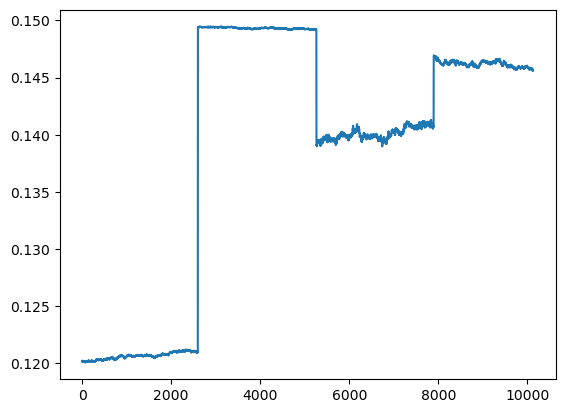

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8b75ed2d60>

In [15]:
plot(flatview(unshaped.(samples.v))[1,:])

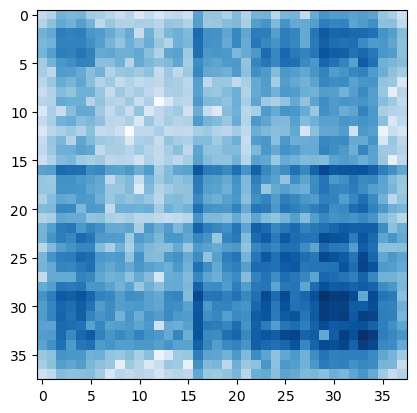

PyObject <matplotlib.image.AxesImage object at 0x7f8b75a06c10>

In [16]:
plt.imshow(log.(abs.(cov(flatview(unshaped.(samples.v))'))), cmap="Blues")

In [ ]:
# BAT.bat_write("../data/sampling_results/MultipleEvents-2/mcmc-samples-1-3.hdf5", unshaped.(samples))

# BAT.bat_write("../data/sampling_results/To_delete_2/new_cv-nontr.hdf5", unshaped.(samples))

In [17]:
mode(samples)[1]

(tr_size = [0.12100992449417103, 0.10678900821005516], ang_spr = [5.761742512768426, 6.046228624598456], ang_spr_2 = [2.7978696526073312, 2.89432049870672], mixt_pow = 0.7249471739553793, waist = [2.891175188706563], algmx = [36.93137327303597, 37.439999259591566, 20.219015804726578, 33.88493374450881], algmy = [31.744887219122845, 32.246085217220546, 21.319711087047608, 35.23478679427057], cam4_ped = 27.708740624764012, cam4_light_fluct = 1.3795109182066128, cam4_light_amp = 8.823454923235582, resx = [0.08988721758127219, 1.8045099407557494, 0.10920455863317671], resy = [0.44731020930903415, 2.1081284618536222, 1.08933840312454], cam4_resx = 3.786679645399343, cam4_resy = 2.8366263834128302, psx = [28.04090615759816, 20.975415125575356, 130.03498776757937], psy = [25.837373062793713, 21.905674360637022, 130.81061201966568], cam4_psx = 120.46643184695866, cam4_psy = 113.82458657967615, light_amp = [8.576764955210987, 11.37360280609714, 2.660036538672571], s_cam = [0.0, 1.478, 15.026, 2

In [18]:
bat_marginalmode(samples).result

ShapedAsNT((tr_size = [0.1493, 0.2025], ang_spr = [4.535, 5.345], ang_spr_2 = [1.565, 2.8449999999999998], mixt_pow = 0.9025000000000001, waist = [2.8285], algmx = [36.954499999999996, 37.4285, 20.2205, 33.9105], algmy = [31.735500000000002, 32.221000000000004, 21.241500000000002, 35.2275], cam4_ped = 31.725, cam4_light_fluct = 1.3824999999999998, cam4_light_amp = 8.8375, resx = [0.1325, 1.1949999999999998, 0.0045000000000000005], resy = [0.45, 0.05, 0.745], cam4_resx = 5.574999999999999, cam4_resy = 0.025, psx = [28.015, 23.15, 115.05], psy = [33.925, 33.05, 126.775], cam4_psx = 123.85, cam4_psy = 107.525, light_amp = [8.344999999999999, 11.399000000000001, 2.6574999999999998], s_cam = [0.0, 1.478, 15.026, 23.115]))

In [19]:
mean(samples)[1]

(tr_size = [0.13906241493158028, 0.13346564634354666], ang_spr = [4.939674602591019, 5.423126342753155], ang_spr_2 = [2.241729917866242, 2.8912735563201273], mixt_pow = 0.8438955875757626, waist = [2.8681044202591797], algmx = [36.96161380892606, 37.4351891367527, 20.232645574649172, 33.87161112993739], algmy = [31.74666845563407, 32.219758234984646, 21.278232234971593, 35.24427689526007], cam4_ped = 30.93997471457106, cam4_light_fluct = 1.6303498689745115, cam4_light_amp = 8.622669932390655, resx = [0.20422862583808044, 1.071421367087165, 0.04191339990908849], resy = [1.7112229167451602, 1.876597341054315, 0.8568507070552149], cam4_resx = 3.6059248785240965, cam4_resy = 1.9598118174659596, psx = [28.252825157000974, 22.25818370256881, 122.35278533223199], psy = [28.733351990601395, 25.82840539317213, 127.31046933699662], cam4_psx = 115.65442150815288, cam4_psy = 111.81390878915391, light_amp = [8.384938273064813, 11.406532025600349, 2.655725254846298], s_cam = [0.0, 1.478, 15.026, 23.

In [20]:
std(samples)[1]

(tr_size = [0.011143328462186368, 0.04274363827647417], ang_spr = [0.5044900112938708, 0.42290784974149537], ang_spr_2 = [0.6631508833527471, 0.413013999240188], mixt_pow = 0.0743340955525304, waist = [0.02854612965091695], algmx = [0.0295190319776749, 0.029214180139704508, 0.03675238856116311, 0.03368677404743331], algmy = [0.02192048892318861, 0.03791872065585188, 0.045117069873197795, 0.023367274060577165], cam4_ped = 1.9247822106837351, cam4_light_fluct = 0.1929245416295831, cam4_light_amp = 0.13829618688930462, resx = [0.14631291666607327, 0.4293426420182172, 0.039145870412657886], resy = [1.392068557355781, 1.5179117999300813, 0.369179826344873], cam4_resx = 2.0584257980082086, cam4_resy = 1.8065392025643718, psx = [0.3718989038248968, 0.8709755616002163, 6.212395384100136], psy = [3.425250752259878, 4.30552564016653, 2.0074494805338836], cam4_psx = 6.883261404877018, cam4_psy = 2.9423601550615754, light_amp = [0.11909666002941459, 0.06144392752768728, 0.017568087233221355], s_ca

In [21]:
# dims = [1,2,3,4,5,]
dims = [1,2,3,4,5,6,7,8]
names = [1,2,3,4,5,6,7,8]
levels = [0.01, 0.55, 0.9, 0.95,  1,]
# levels = [0.5, 1,]
figsize = (8,8)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/vhafych/.julia/packages/PyCall/BcTLp/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('Contour levels must be increasing')
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/__init__.py", line 1438, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/axes/_axes.py", line 6332, in contourf
    contours = mcontour.QuadContourSet(self, *args, **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 816, in __init__
    kwargs = self._process_args(*args, **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1430, in _process_args
    x, y, z = self._contour_args(args, kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1501, in _contour_args
    self._process_contour_level_args(args)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1172, in _process_contour_level_args
    raise ValueError("Contour levels must be increasing")


In [22]:
dims = [6,7,8,9,10,11,12, 13]
names = ["6", "7", "8", "9", "10", "11", "12", "13"]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.1, 0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/vhafych/.julia/packages/PyCall/BcTLp/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('Contour levels must be increasing')
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/__init__.py", line 1438, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/axes/_axes.py", line 6332, in contourf
    contours = mcontour.QuadContourSet(self, *args, **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 816, in __init__
    kwargs = self._process_args(*args, **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1430, in _process_args
    x, y, z = self._contour_args(args, kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1501, in _contour_args
    self._process_contour_level_args(args)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1172, in _process_contour_level_args
    raise ValueError("Contour levels must be increasing")


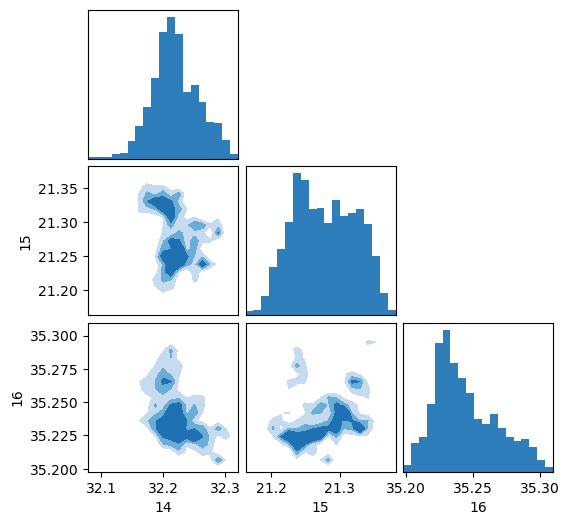

In [23]:
dims = [14,15,16,]
names = [14,15,16,]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.1, 0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [24]:
# res

dims = [17,18,19,20,21,22,23,24]
names = [17,18,19,20,21, 22, 23, 24]
levels = [0.1, 0.5, 0.9, 0.95,  1,]
# levels = [0.1, 0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/vhafych/.julia/packages/PyCall/BcTLp/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('Contour levels must be increasing')
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/__init__.py", line 1438, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/axes/_axes.py", line 6332, in contourf
    contours = mcontour.QuadContourSet(self, *args, **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 816, in __init__
    kwargs = self._process_args(*args, **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1430, in _process_args
    x, y, z = self._contour_args(args, kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1501, in _contour_args
    self._process_contour_level_args(args)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1172, in _process_contour_level_args
    raise ValueError("Contour levels must be increasing")


In [25]:
#pix

dims = [25,26,27,28,29, 30, 31, 32]
names = [25,26,27,28,29, 30, 31, 32]
levels = [0.1, 0.8, 0.9, 0.95, 1,]
# levels = [0.1, 0.5, 1,]
figsize = (8,8)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/vhafych/.julia/packages/PyCall/BcTLp/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('Contour levels must be increasing')
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/__init__.py", line 1438, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/axes/_axes.py", line 6332, in contourf
    contours = mcontour.QuadContourSet(self, *args, **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 816, in __init__
    kwargs = self._process_args(*args, **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1430, in _process_args
    x, y, z = self._contour_args(args, kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1501, in _contour_args
    self._process_contour_level_args(args)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1172, in _process_contour_level_args
    raise ValueError("Contour levels must be increasing")


In [26]:
dims = [33, 34, 35]
names = [33, 34, 35]
levels = [0.1, 0.8, 0.9, 0.95, 1,]
# levels = [0.1, 0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/vhafych/.julia/packages/PyCall/BcTLp/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('Contour levels must be increasing')
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/__init__.py", line 1438, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/axes/_axes.py", line 6332, in contourf
    contours = mcontour.QuadContourSet(self, *args, **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 816, in __init__
    kwargs = self._process_args(*args, **kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1430, in _process_args
    x, y, z = self._contour_args(args, kwargs)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1501, in _contour_args
    self._process_contour_level_args(args)
  File "/Users/vhafych/.julia/conda/3/lib/python3.8/site-packages/matplotlib/contour.py", line 1172, in _process_contour_level_args
    raise ValueError("Contour levels must be increasing")


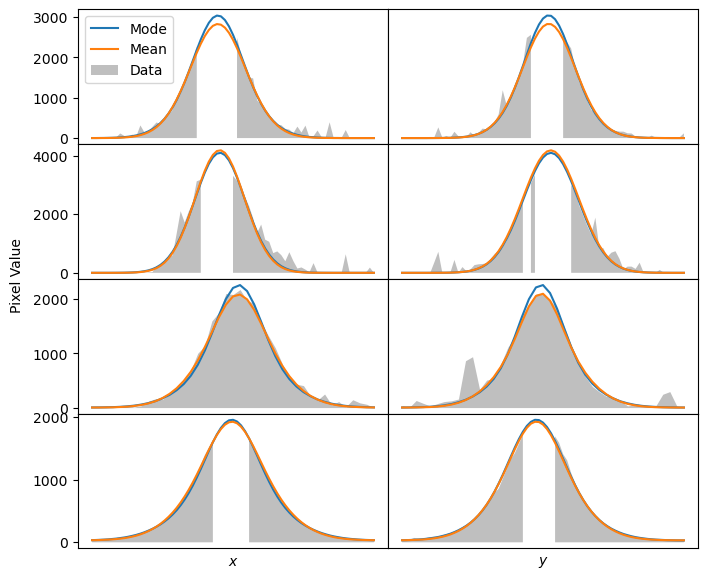

PyObject Text(0.04, 0.5, 'Pixel Value')

In [27]:
colors_array = ["C0", "C1"]
labels_array = ["Mode", "Mean"]
params_array = [mode(samples)[1], mean(samples)[1]]

plot_cam_crossections(params_array, event, conv_matrices, colors = colors_array, labels=labels_array)

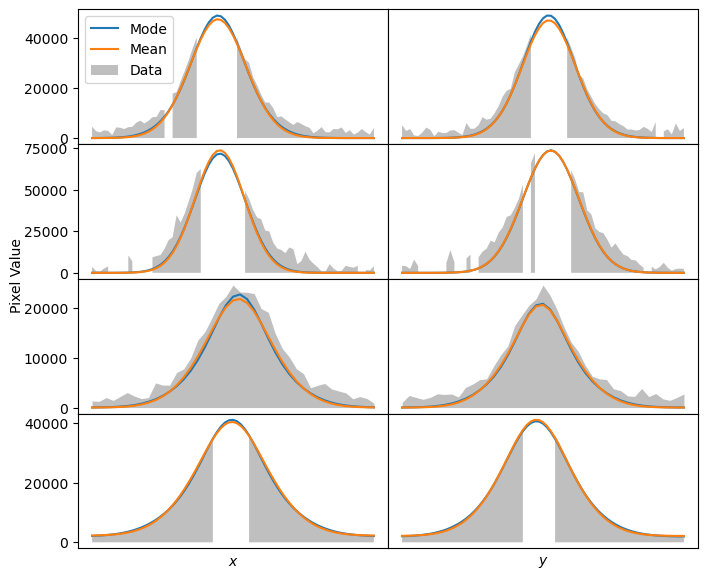

PyObject Text(0.04, 0.5, 'Pixel Value')

In [28]:
colors_array = ["C0", "C1"]
labels_array = ["Mode", "Mean"]
params_array = [mode(samples)[1], mean(samples)[1]]

plot_cam_integral(params_array, event, conv_matrices, colors = colors_array, labels=labels_array)

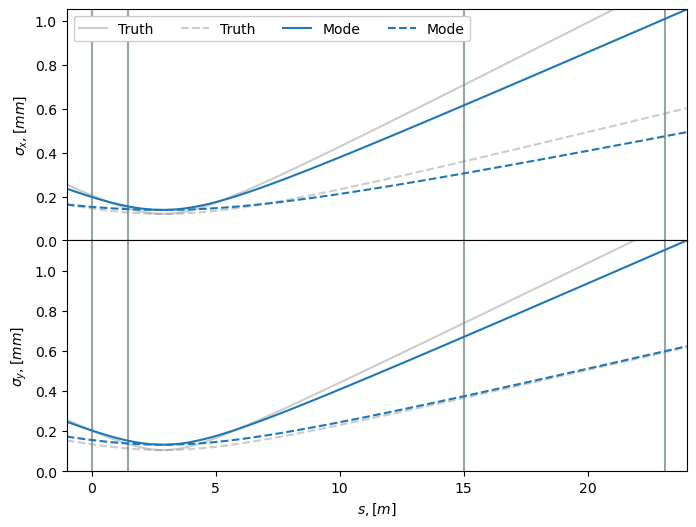

PyObject Text(0.5, 26.28125, '$s, [m]$')

In [29]:
params_array = [mode(samples)[1], mean(samples)[1]]
colors_array = ["gray", "C0", "C1"]
labels_array = ["Truth", "Mode", "Mean"]

plot_envelop_trajectory(params_array,  labels = labels_array, colors=colors_array)

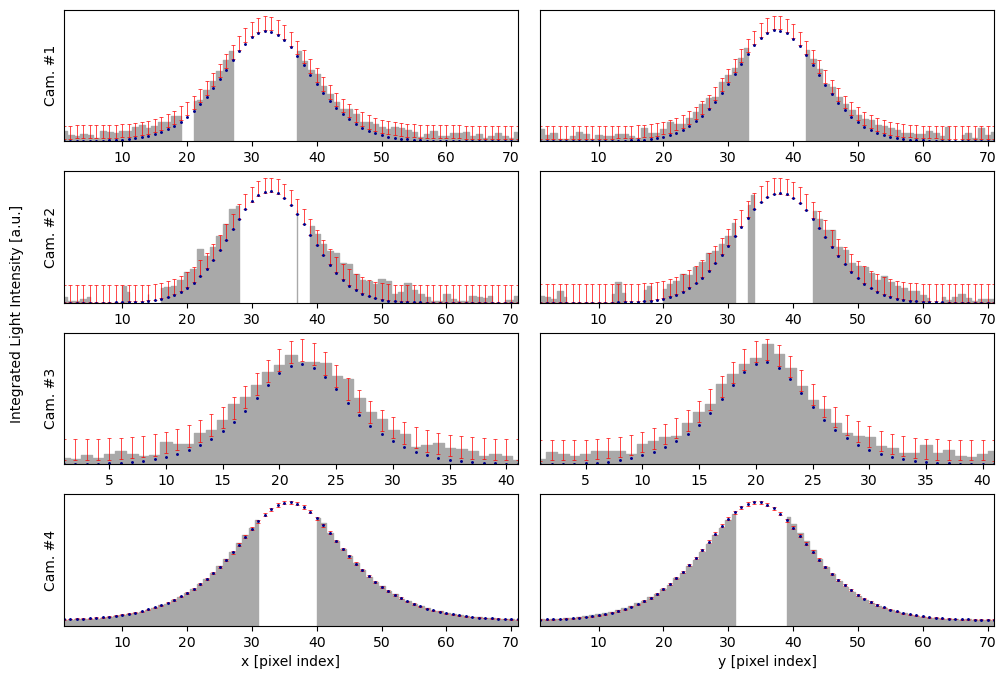

PyObject Text(0.08, 0.5, 'Integrated Light Intensity [a.u.]')

In [30]:
plot_projections(conv_matrices, event, event, params_array[1])